In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Pre-Process

In [ ]:
########### Libraries ###########
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer #Imputing missing values
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error #Metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


########### Data ###########
node10fish = pd.read_csv("/content/drive/MyDrive/ML/Node10.csv")
node22fish = pd.read_csv("/content/drive/MyDrive/ML/Node22.csv")
node10temp = pd.read_csv("/content/drive/MyDrive/ML/TempNode10.csv")
node22temp = pd.read_csv("/content/drive/MyDrive/ML/TempNode22.csv")

########### Drop Unnecessary Columns ###########
columns_fish = ['LOCAL_DATE', 'TOTAL', 'PEAK_TIME']
node10fish = node10fish[columns_fish]
node22fish = node22fish[columns_fish]

columns_temp = ['LOCAL_DATE', 'MEAN_TEMPERATURE', 'MEAN_TEMPERATURE_YESTERDAY', 'TOTAL_PRECIPITATION', 'TOTAL_PRECIPITATION_YESTERDAY']
node10temp = node10temp[columns_temp]
node22temp = node22temp[columns_temp]

########### Impute ###########
node10fish.replace('?', np.nan, inplace=True)
node22fish.replace('?', np.nan, inplace=True)
node10temp.replace('?', np.nan, inplace=True)
node22temp.replace('?', np.nan, inplace=True)

imputer = SimpleImputer(strategy='median') #Median
node10fish[node10fish.columns.difference(['LOCAL_DATE'])] = imputer.fit_transform(node10fish[node10fish.columns.difference(['LOCAL_DATE'])])
node22fish[node22fish.columns.difference(['LOCAL_DATE'])] = imputer.fit_transform(node22fish[node22fish.columns.difference(['LOCAL_DATE'])])

node10temp[node10temp.columns.difference(['LOCAL_DATE'])] = imputer.fit_transform(node10temp[node10temp.columns.difference(['LOCAL_DATE'])])
node22temp[node22temp.columns.difference(['LOCAL_DATE'])] = imputer.fit_transform(node22temp[node22temp.columns.difference(['LOCAL_DATE'])])


########### Remove Noise ###########
window_size = 9 #CMA Window Size
node10fish['PEAK_TIME'] = node10fish['PEAK_TIME'].rolling(window=window_size, center=True).mean()
node10fish['TOTAL'] = node10fish['TOTAL'].rolling(window=window_size, center=True).mean()

node22fish['PEAK_TIME'] = node22fish['PEAK_TIME'].rolling(window=window_size, center=True).mean()
node22fish['TOTAL'] = node22fish['TOTAL'].rolling(window=window_size, center=True).mean()


########### Join with temp on date column ###########
node10 = pd.merge(node10fish, node10temp, on='LOCAL_DATE', how='inner')
node22 = pd.merge(node22fish, node22temp, on='LOCAL_DATE', how='inner')


########### Drop Unnecessary Columns ###########
node10 = node10[node10.columns.difference(['LOCAL_DATE'])]
node22 = node22[node22.columns.difference(['LOCAL_DATE'])]




########### Visualize Predictions Function ###########
def visualize_predictions(y_true, predictions, title):
    plt.scatter(y_true, predictions)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

#Linear Regression

Mean Absolute Error (Node 10 - PEAK_TIME): 50.4330110196734
Mean Absolute Error (Node 10 - TOTAL): 19.1047661892838
Mean Absolute Error (Node 22 - PEAK_TIME): 72.71040637616971
Mean Absolute Error (Node 22 - TOTAL): 45.488846423728944


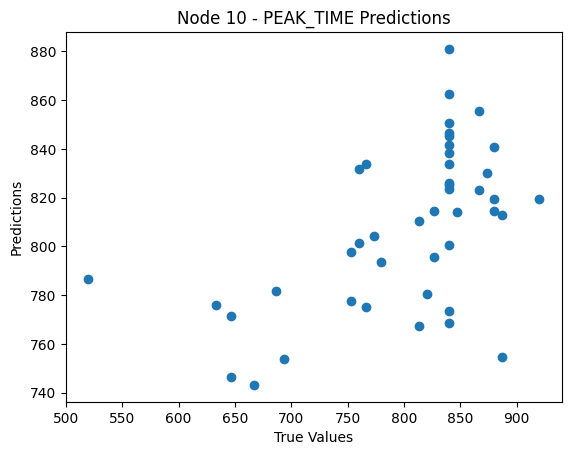

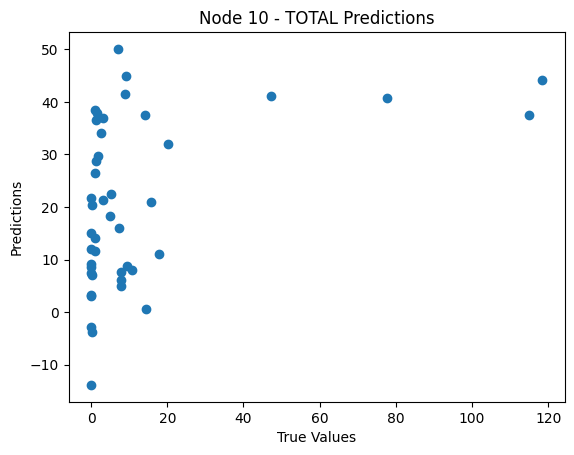

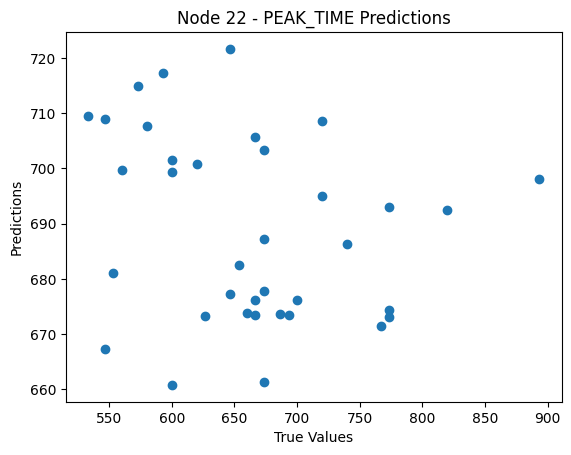

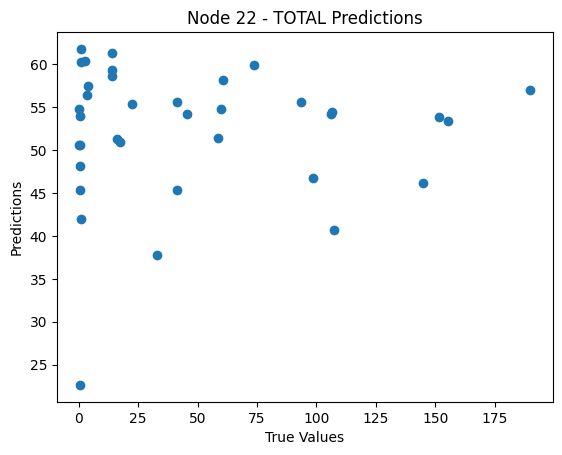

In [ ]:
# Define the features and target variables
########### Define Features and Target Variables ###########
features = ['MEAN_TEMPERATURE', 'MEAN_TEMPERATURE_YESTERDAY', 'TOTAL_PRECIPITATION', 'TOTAL_PRECIPITATION_YESTERDAY']
target_peak_time = 'PEAK_TIME'
target_total = 'TOTAL'

X_node10 = node10[features]
y_node10_peak_time = node10[target_peak_time]
y_node10_total = node10[target_total]

X_node22 = node22[features]
y_node22_peak_time = node22[target_peak_time]
y_node22_total = node22[target_total]

########### Split Data into Training and Testing Sets ###########
X_train_node10, X_test_node10, y_train_node10_peak_time, y_test_node10_peak_time, y_train_node10_total, y_test_node10_total = train_test_split(
    X_node10, y_node10_peak_time, y_node10_total, test_size=0.2, random_state=42
)

X_train_node22, X_test_node22, y_train_node22_peak_time, y_test_node22_peak_time, y_train_node22_total, y_test_node22_total = train_test_split(
    X_node22, y_node22_peak_time, y_node22_total, test_size=0.2, random_state=42
)

########### Train Linear Regression Model ###########
model_node10_peak_time = LinearRegression()
model_node10_peak_time.fit(X_train_node10, y_train_node10_peak_time)

model_node10_total = LinearRegression()
model_node10_total.fit(X_train_node10, y_train_node10_total)

model_node22_peak_time = LinearRegression()
model_node22_peak_time.fit(X_train_node22, y_train_node22_peak_time)

model_node22_total = LinearRegression()
model_node22_total.fit(X_train_node22, y_train_node22_total)

########### Make Predictions ###########
predictions_node10_peak_time = model_node10_peak_time.predict(X_test_node10)
predictions_node10_total = model_node10_total.predict(X_test_node10)

predictions_node22_peak_time = model_node22_peak_time.predict(X_test_node22)
predictions_node22_total = model_node22_total.predict(X_test_node22)

########### Evaluate Model Performance ###########
mae_node10_peak_time = mean_absolute_error(y_test_node10_peak_time, predictions_node10_peak_time)
mae_node10_total = mean_absolute_error(y_test_node10_total, predictions_node10_total)
mae_node22_peak_time = mean_absolute_error(y_test_node22_peak_time, predictions_node22_peak_time)
mae_node22_total = mean_absolute_error(y_test_node22_total, predictions_node22_total)

########### Print Predictions ###########
print(f'Mean Absolute Error (Node 10 - PEAK_TIME): {mae_node10_peak_time}')
print(f'Mean Absolute Error (Node 10 - TOTAL): {mae_node10_total}')
print(f'Mean Absolute Error (Node 22 - PEAK_TIME): {mae_node22_peak_time}')
print(f'Mean Absolute Error (Node 22 - TOTAL): {mae_node22_total}')

# Visualize Predictions using scatter plots
visualize_predictions(y_test_node10_peak_time, predictions_node10_peak_time, 'Node 10 - PEAK_TIME Predictions')
visualize_predictions(y_test_node10_total, predictions_node10_total, 'Node 10 - TOTAL Predictions')
visualize_predictions(y_test_node22_peak_time, predictions_node22_peak_time, 'Node 22 - PEAK_TIME Predictions')
visualize_predictions(y_test_node22_total, predictions_node22_total, 'Node 22 - TOTAL Predictions')



#Neural Network

Epoch 1/125
6/6 [==============================] - 4s 220ms/step - loss: 797.6232 - val_loss: 800.8027
Epoch 2/125
6/6 [==============================] - 0s 37ms/step - loss: 796.9349 - val_loss: 800.2162
Epoch 3/125
6/6 [==============================] - 0s 59ms/step - loss: 796.0526 - val_loss: 799.3859
Epoch 4/125
6/6 [==============================] - 0s 24ms/step - loss: 794.8770 - val_loss: 798.2152
Epoch 5/125
6/6 [==============================] - 0s 43ms/step - loss: 793.1718 - val_loss: 796.5872
Epoch 6/125
6/6 [==============================] - 0s 24ms/step - loss: 790.8322 - val_loss: 794.3333
Epoch 7/125
6/6 [==============================] - 0s 35ms/step - loss: 787.7247 - val_loss: 791.2514
Epoch 8/125
6/6 [==============================] - 0s 23ms/step - loss: 783.5797 - val_loss: 787.1549
Epoch 9/125
6/6 [==============================] - 0s 25ms/step - loss: 777.9471 - val_loss: 781.8306
Epoch 10/125
6/6 [==============================] - 0s 27ms/step - loss: 770.9254

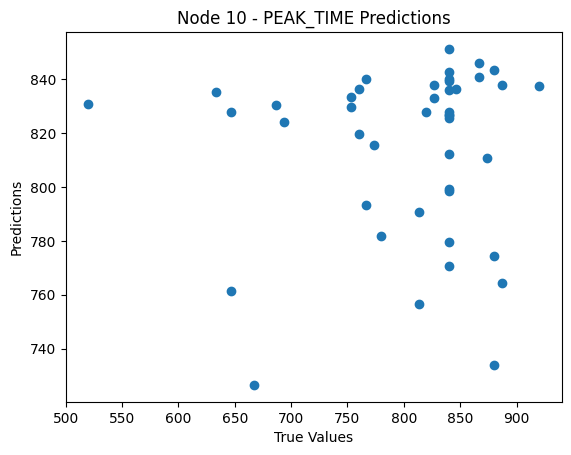

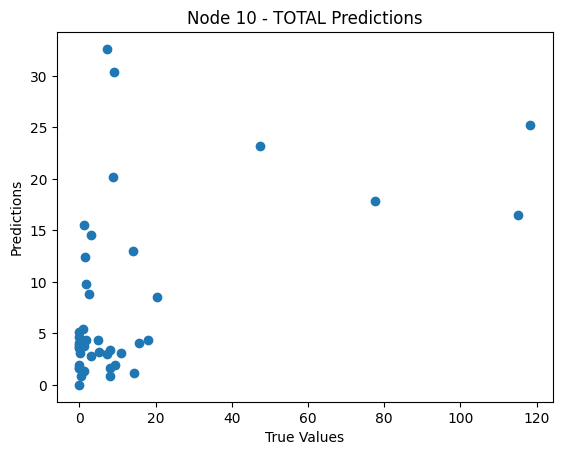

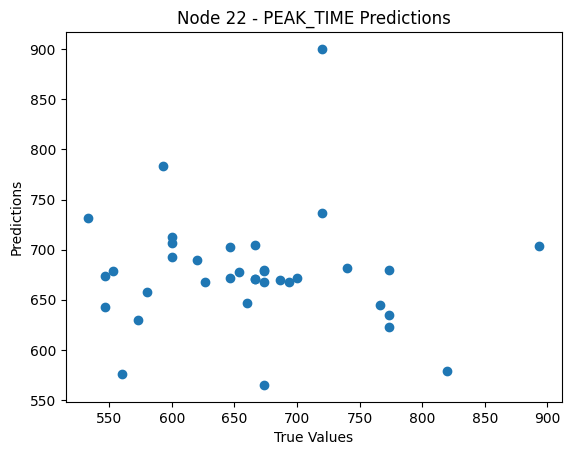

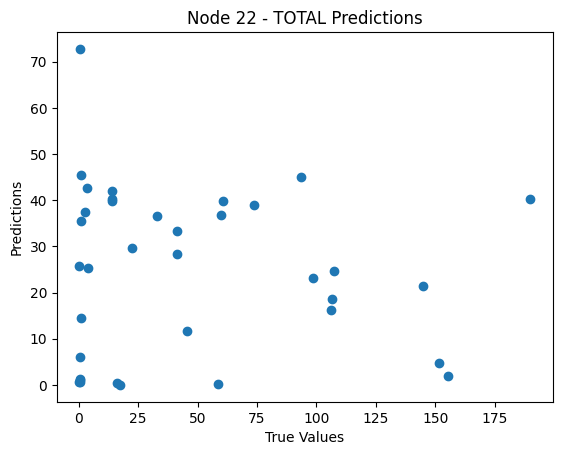

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


########### Data ###########
# (Assuming 'node10' and 'node22' are already loaded and preprocessed)

########### Define Features and Target Variables ###########
features = ['MEAN_TEMPERATURE', 'MEAN_TEMPERATURE_YESTERDAY', 'TOTAL_PRECIPITATION', 'TOTAL_PRECIPITATION_YESTERDAY']
target_peak_time = 'PEAK_TIME'
target_total = 'TOTAL'

X_node10 = node10[features]
y_node10_peak_time = node10[target_peak_time]
y_node10_total = node10[target_total]

X_node22 = node22[features]
y_node22_peak_time = node22[target_peak_time]
y_node22_total = node22[target_total]

########### Split Data into Training and Testing Sets ###########
X_train_node10, X_test_node10, y_train_node10_peak_time, y_test_node10_peak_time, y_train_node10_total, y_test_node10_total = train_test_split(
    X_node10, y_node10_peak_time, y_node10_total, test_size=0.2, random_state=42
)

X_train_node22, X_test_node22, y_train_node22_peak_time, y_test_node22_peak_time, y_train_node22_total, y_test_node22_total = train_test_split(
    X_node22, y_node22_peak_time, y_node22_total, test_size=0.2, random_state=42
)

########### Standardize the Data ###########
scaler = StandardScaler()
X_train_node10_scaled = scaler.fit_transform(X_train_node10)
X_test_node10_scaled = scaler.transform(X_test_node10)

X_train_node22_scaled = scaler.fit_transform(X_train_node22)
X_test_node22_scaled = scaler.transform(X_test_node22)

########### Build Neural Network Model ###########
def build_model(input_shape):
    model = keras.Sequential([
        layers.Dense(313, activation='relu', input_shape=(input_shape,)),
        layers.Dense(157, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_absolute_error')
    return model

# Get the number of features
num_features = X_train_node10_scaled.shape[1]

# Build models for both nodes and both target variables
model_node10_peak_time = build_model(num_features)
model_node10_total = build_model(num_features)
model_node22_peak_time = build_model(num_features)
model_node22_total = build_model(num_features)

########### Train Neural Network Model ###########
def train_model(model, X_train, y_train, epochs=125, batch_size=32, validation_data=None):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data)

# Train models for both nodes and both target variables
train_model(model_node10_peak_time, X_train_node10_scaled, y_train_node10_peak_time, epochs=125, batch_size=32, validation_data=(X_test_node10_scaled, y_test_node10_peak_time))
train_model(model_node10_total, X_train_node10_scaled, y_train_node10_total, epochs=125, batch_size=32, validation_data=(X_test_node10_scaled, y_test_node10_total))
train_model(model_node22_peak_time, X_train_node22_scaled, y_train_node22_peak_time, epochs=125, batch_size=32, validation_data=(X_test_node22_scaled, y_test_node22_peak_time))
train_model(model_node22_total, X_train_node22_scaled, y_train_node22_total, epochs=125, batch_size=32, validation_data=(X_test_node22_scaled, y_test_node22_total))

########### Make Predictions ###########
predictions_node10_peak_time = model_node10_peak_time.predict(X_test_node10_scaled)
predictions_node10_total = model_node10_total.predict(X_test_node10_scaled)

predictions_node22_peak_time = model_node22_peak_time.predict(X_test_node22_scaled)
predictions_node22_total = model_node22_total.predict(X_test_node22_scaled)

# Evaluate Model Performance using MAE and R-squared
mae_node10_peak_time = mean_absolute_error(y_test_node10_peak_time, predictions_node10_peak_time)
mae_node10_total = mean_absolute_error(y_test_node10_total, predictions_node10_total)
mae_node22_peak_time = mean_absolute_error(y_test_node22_peak_time, predictions_node22_peak_time)
mae_node22_total = mean_absolute_error(y_test_node22_total, predictions_node22_total)

# Print MAE and R-squared
print(f'Mean Absolute Error (Node 10 - PEAK_TIME): {mae_node10_peak_time}')
print(f'Mean Absolute Error (Node 10 - TOTAL): {mae_node10_total}')
print(f'Mean Absolute Error (Node 22 - PEAK_TIME): {mae_node22_peak_time}')
print(f'Mean Absolute Error (Node 22 - TOTAL): {mae_node22_total}')

# Visualize Predictions using scatter plots
visualize_predictions(y_test_node10_peak_time, predictions_node10_peak_time.flatten(), 'Node 10 - PEAK_TIME Predictions')
visualize_predictions(y_test_node10_total, predictions_node10_total.flatten(), 'Node 10 - TOTAL Predictions')
visualize_predictions(y_test_node22_peak_time, predictions_node22_peak_time.flatten(), 'Node 22 - PEAK_TIME Predictions')
visualize_predictions(y_test_node22_total, predictions_node22_total.flatten(), 'Node 22 - TOTAL Predictions')

#XGBRegressor

Mean Absolute Error (Node 10 - PEAK_TIME): 54.1123740456321
Mean Absolute Error (Node 10 - TOTAL): 12.475366961173336
Mean Absolute Error (Node 22 - PEAK_TIME): 83.43670597782844
Mean Absolute Error (Node 22 - TOTAL): 56.63307236355764


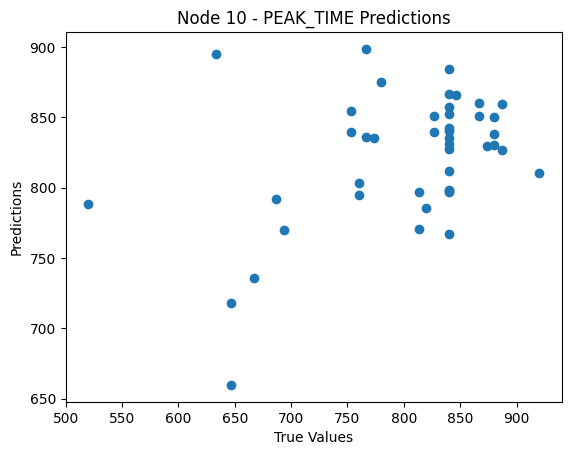

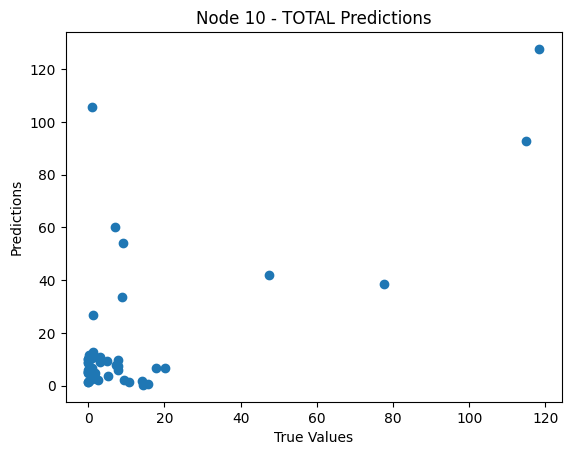

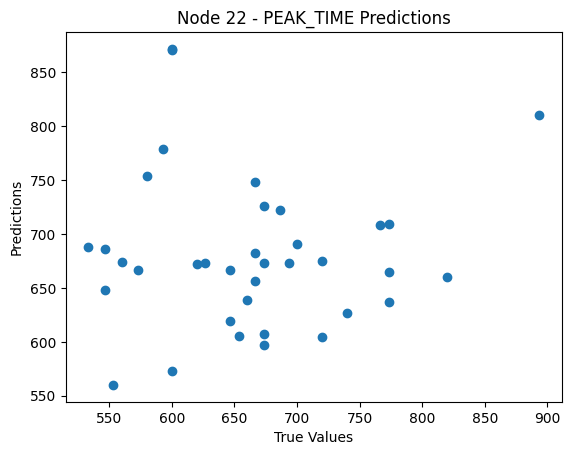

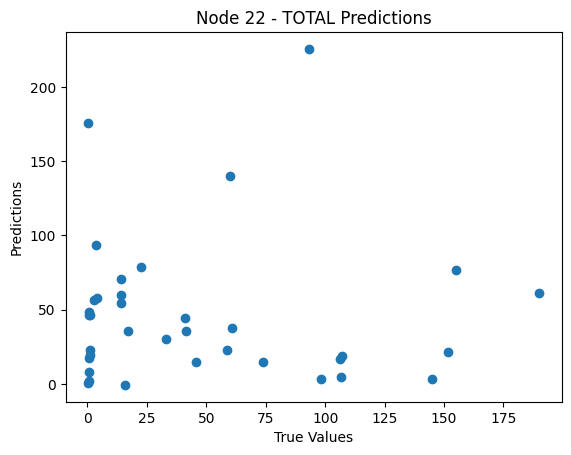

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Define the features and target variables
features = ['MEAN_TEMPERATURE', 'MEAN_TEMPERATURE_YESTERDAY', 'TOTAL_PRECIPITATION', 'TOTAL_PRECIPITATION_YESTERDAY']
target_peak_time = 'PEAK_TIME'
target_total = 'TOTAL'

X_node10 = node10[features]
y_node10_peak_time = node10[target_peak_time]
y_node10_total = node10[target_total]

X_node22 = node22[features]
y_node22_peak_time = node22[target_peak_time]
y_node22_total = node22[target_total]

# Split Data into Training and Testing Sets
X_train_node10, X_test_node10, y_train_node10_peak_time, y_test_node10_peak_time, y_train_node10_total, y_test_node10_total = train_test_split(
    X_node10, y_node10_peak_time, y_node10_total, test_size=0.2, random_state=42
)

X_train_node22, X_test_node22, y_train_node22_peak_time, y_test_node22_peak_time, y_train_node22_total, y_test_node22_total = train_test_split(
    X_node22, y_node22_peak_time, y_node22_total, test_size=0.2, random_state=42
)

# Standardize the Data
scaler = StandardScaler()
X_train_node10_scaled = scaler.fit_transform(X_train_node10)
X_test_node10_scaled = scaler.transform(X_test_node10)

X_train_node22_scaled = scaler.fit_transform(X_train_node22)
X_test_node22_scaled = scaler.transform(X_test_node22)

# Build XGBRegressor Models
def build_xgb_model():
    return XGBRegressor(objective='reg:squarederror', random_state=42)

# Build models for both nodes and both target variables
model_node10_peak_time = build_xgb_model()
model_node10_total = build_xgb_model()
model_node22_peak_time = build_xgb_model()
model_node22_total = build_xgb_model()

# Train XGBRegressor Models
def train_xgb_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    return predictions, mae

# Train and Evaluate models for both nodes and both target variables
predictions_node10_peak_time, mae_node10_peak_time = train_xgb_model(model_node10_peak_time, X_train_node10_scaled, y_train_node10_peak_time, X_test_node10_scaled, y_test_node10_peak_time)
predictions_node10_total, mae_node10_total = train_xgb_model(model_node10_total, X_train_node10_scaled, y_train_node10_total, X_test_node10_scaled, y_test_node10_total)
predictions_node22_peak_time, mae_node22_peak_time = train_xgb_model(model_node22_peak_time, X_train_node22_scaled, y_train_node22_peak_time, X_test_node22_scaled, y_test_node22_peak_time)
predictions_node22_total, mae_node22_total = train_xgb_model(model_node22_total, X_train_node22_scaled, y_train_node22_total, X_test_node22_scaled, y_test_node22_total)

# Print Mean Absolute Errors
print(f'Mean Absolute Error (Node 10 - PEAK_TIME): {mae_node10_peak_time}')
print(f'Mean Absolute Error (Node 10 - TOTAL): {mae_node10_total}')
print(f'Mean Absolute Error (Node 22 - PEAK_TIME): {mae_node22_peak_time}')
print(f'Mean Absolute Error (Node 22 - TOTAL): {mae_node22_total}')

########### Graph ###########
visualize_predictions(y_test_node10_peak_time, predictions_node10_peak_time, 'Node 10 - PEAK_TIME Predictions')
visualize_predictions(y_test_node10_total, predictions_node10_total, 'Node 10 - TOTAL Predictions')
visualize_predictions(y_test_node22_peak_time, predictions_node22_peak_time, 'Node 22 - PEAK_TIME Predictions')
visualize_predictions(y_test_node22_total, predictions_node22_total, 'Node 22 - TOTAL Predictions')

#Results
###Linear Regression
* Mean Absolute Error (Node 10 - PEAK_TIME): 50.4330110196734
* Mean Absolute Error (Node 10 - TOTAL): 19.1047661892838
* Mean Absolute Error (Node 22 - PEAK_TIME): 72.71040637616971
* Mean Absolute Error (Node 22 - TOTAL): 45.488846423728944

###Neural Network
* Mean Absolute Error (Node 10 - PEAK_TIME): 60.36351059422348
* Mean Absolute Error (Node 10 - TOTAL): 11.951851188882511
* Mean Absolute Error (Node 22 - PEAK_TIME): 79.51660495334202
* Mean Absolute Error (Node 22 - TOTAL): 43.46339750033516

###XGB Regressor
* Mean Absolute Error (Node 10 - PEAK_TIME): 54.1123740456321
* Mean Absolute Error (Node 10 - TOTAL): 12.475366961173336
* Mean Absolute Error (Node 22 - PEAK_TIME): 83.43670597782844
* Mean Absolute Error (Node 22 - TOTAL): 56.63307236355764